In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [124]:
ds=pd.read_csv(r"C:\Users\shobhit.saxena\Music\Python_New\Projects\Advertising.csv")

In [125]:
ds.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [126]:
ds.shape

(200, 5)

In [127]:
ds.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [128]:
ds.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [129]:
ds.isnull().sum() ######Checking null values in each of the column

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0xe0cf4e0>,
 'caps': [<matplotlib.lines.Line2D at 0xe0cfb70>,
 'boxes': [<matplotlib.lines.Line2D at 0xe0cf0b8>],
 'medians': [<matplotlib.lines.Line2D at 0xe0cff98>],
 'fliers': [<matplotlib.lines.Line2D at 0xe0d8588>],
 'means': []}

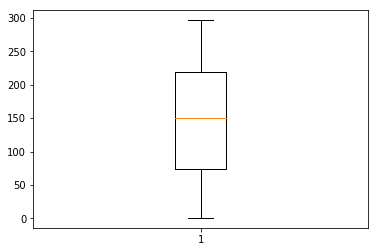

In [130]:
plt.boxplot(ds['TV']) ######Checking for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0xe121d30>,
 'caps': [<matplotlib.lines.Line2D at 0xe12b6d8>,
 'boxes': [<matplotlib.lines.Line2D at 0xe121be0>],
 'medians': [<matplotlib.lines.Line2D at 0xe12bd68>],
 'fliers': [<matplotlib.lines.Line2D at 0xe12be48>],
 'means': []}

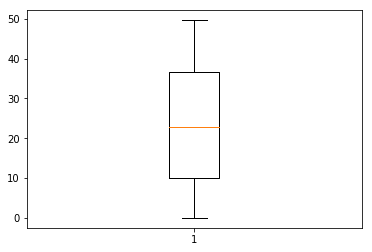

In [131]:
plt.boxplot(ds['radio'])

{'whiskers': [<matplotlib.lines.Line2D at 0xf60e668>,
 'caps': [<matplotlib.lines.Line2D at 0xf60ecf8>,
 'boxes': [<matplotlib.lines.Line2D at 0xf60e240>],
 'medians': [<matplotlib.lines.Line2D at 0xf6183c8>],
 'fliers': [<matplotlib.lines.Line2D at 0xf618710>],
 'means': []}

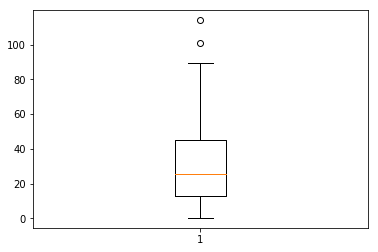

In [132]:
plt.boxplot(ds['newspaper']) ####Since there are only 2 outliers in the data and they seem appt., we are not removing them

{'whiskers': [<matplotlib.lines.Line2D at 0xf662cc0>,
 'caps': [<matplotlib.lines.Line2D at 0xf66d390>,
 'boxes': [<matplotlib.lines.Line2D at 0xf662898>],
 'medians': [<matplotlib.lines.Line2D at 0xf66da20>],
 'fliers': [<matplotlib.lines.Line2D at 0xf66dd68>],
 'means': []}

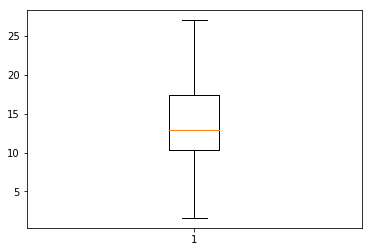

In [133]:
plt.boxplot(ds['sales'])

In [134]:
ds.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


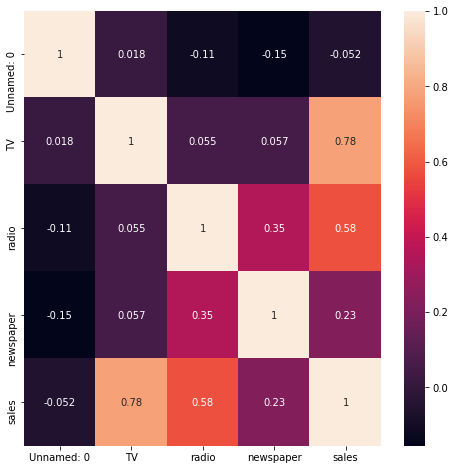

In [135]:
corr_hmap=ds.corr()    #######Checking correlation among the variables and with the target variable
plt.figure(figsize=(8,8))
sns.heatmap(corr_hmap,annot=True)
plt.show()

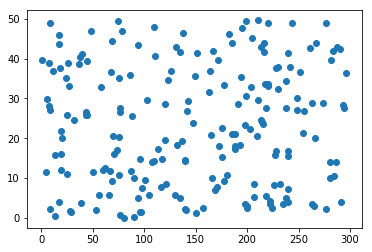

In [136]:
plt.scatter(ds['TV'],ds['radio'])

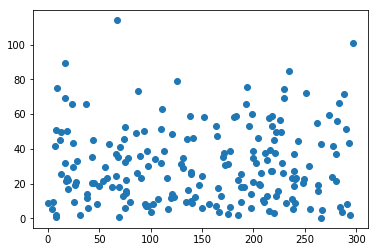

In [137]:
plt.scatter(ds['TV'],ds['newspaper'])

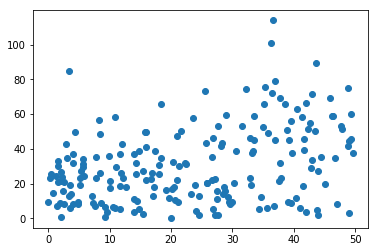

In [138]:
plt.scatter(ds['radio'],ds['newspaper'])

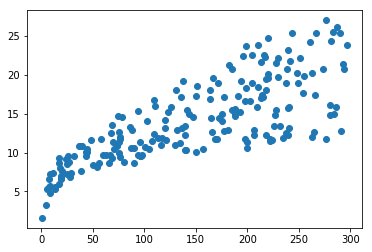

In [139]:
plt.scatter(ds['TV'],ds['sales'])

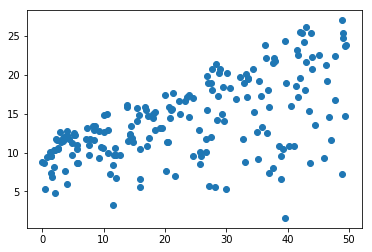

In [140]:
plt.scatter(ds['radio'],ds['sales'])

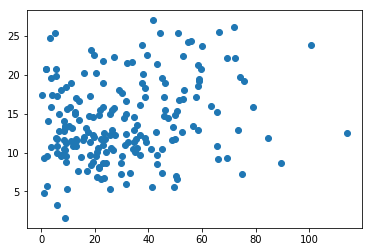

In [141]:
plt.scatter(ds['newspaper'],ds['sales'])

In [142]:
df = pd.DataFrame(ds)
df_cor = df.corr()
pd.DataFrame(np.linalg.inv(df.corr().values), index = df_cor.index, columns=df_cor.columns)

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.029630,-0.076839,0.033302,0.137804,0.062601
TV,-0.076839,6.527534,3.888026,-0.084787,-7.330974
radio,0.033302,3.888026,3.946051,-0.421316,-5.217207
newspaper,0.137804,-0.084787,-0.421316,1.163813,0.050510
sales,0.062601,-7.330974,-5.217207,0.050510,9.732439


In [143]:
ds.drop(['Unnamed: 0'],axis=1,inplace=True)

In [144]:
ds.shape

(200, 4)

In [145]:
x=ds.iloc[:,1:4]
y=ds.iloc[:,-1]

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=53)

In [147]:
x_train.shape

(134, 3)

In [148]:
y_train.shape

(134,)

In [149]:
y_train.shape

(134,)

In [150]:
y_test.shape

(66,)

In [151]:
#lm=LinearRegression()
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
rd=Ridge()

In [152]:
rd.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [153]:
rd.score(x_train,y_train)

0.9999998926218353

In [154]:
rd.coef_

array([ 8.36962830e-05, -3.56368665e-06,  9.99598038e-01])

In [155]:
rd.intercept_

0.003952765035915462

In [156]:
rd.predict(x_test)

array([10.40012684,  7.60251957, 15.89871176,  5.70393064, 11.69943223,
       10.4029009 , 12.60162961, 22.59857328,  9.50218521, 26.99704357,
       15.49980077, 10.1019789 , 19.79822575, 11.39950655, 16.99913165,
       17.9997711 , 21.19908875, 10.80303082, 12.59966228, 17.09884918,
       10.60058728,  7.20187346, 18.29902005, 10.29993951, 12.69893733,
        9.50336514, 11.80136483,  8.40148159, 17.29995703, 21.79828777,
       12.19941491, 19.59957672,  4.80219555, 16.89961589,  9.70090449,
        9.90085588, 12.40005232,  3.20361705,  7.00277563, 10.90290193,
       12.00137385,  9.70104309, 18.89854224, 17.29933604, 22.59821743,
       12.90018416, 10.09991516, 14.60001639,  5.30429139, 13.19922684,
       11.60319344,  8.50253277,  9.50022493, 14.7987728 , 14.99878771,
       24.69811402, 12.20015445, 15.49904345,  5.30176461, 13.30142731,
       11.90048817, 18.99950388, 15.30126357, 13.20019468, 18.49976465,
       15.20069464])

In [157]:
pred=rd.predict(x_test)

In [158]:
print("Predicted Sales",pred)
print("Actual Sales",y_test)

Predicted Sales [10.40012684  7.60251957 15.89871176  5.70393064 11.69943223 10.4029009
 12.60162961 22.59857328  9.50218521 26.99704357 15.49980077 10.1019789
 19.79822575 11.39950655 16.99913165 17.9997711  21.19908875 10.80303082
 12.59966228 17.09884918 10.60058728  7.20187346 18.29902005 10.29993951
 12.69893733  9.50336514 11.80136483  8.40148159 17.29995703 21.79828777
 12.19941491 19.59957672  4.80219555 16.89961589  9.70090449  9.90085588
 12.40005232  3.20361705  7.00277563 10.90290193 12.00137385  9.70104309
 18.89854224 17.29933604 22.59821743 12.90018416 10.09991516 14.60001639
  5.30429139 13.19922684 11.60319344  8.50253277  9.50022493 14.7987728
 14.99878771 24.69811402 12.20015445 15.49904345  5.30176461 13.30142731
 11.90048817 18.99950388 15.30126357 13.20019468 18.49976465 15.20069464]
Actual Sales 143    10.4
172     7.6
188    15.9
132     5.7
100    11.7
1      10.4
115    12.6
185    22.6
66      9.5
175    27.0
120    15.5
149    10.1
109    19.8
50     11.4
74

In [159]:
from sklearn.metrics import mean_squared_error   #########Calculating Mean Squared Error
print("Error:")
print(mean_squared_error(y_test,pred))

Error:
2.882701407054339e-06


In [160]:
from sklearn.metrics import r2_score      ############ Calculating R squared score
print(r2_score(y_test,pred))

0.999999883387479
